In [1]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()
warnings.filterwarnings('ignore')

In [45]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

# Matrix

<div class='intro'> </div>
<p> In mathematics, a matrix is a rectangular array of numbers or symbols arranged in rows and columns.In history,
    a matrix was developed as a tool used for solving system linear equations.The size of matrix is defined by
    the number of columns abd rows that it contains. 
    The size of the matrix is defined by the number of columns and rows that it contains.
    The matrix with m rows and n columns is denoted by $m\times n$ which is written as n-by-m matrix.
    $$A_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix} $$
</p>

## Basic Properties
### Transpose Matrix
The transpose of a matrix is simply a flipped version of the original matrix. We can transpose a matrix by switching its rows with its columns.
We denote the transpose of matrix $A$ by $A^T$. For example, if <br> <br>
 $A_{m,n} = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
 \end{pmatrix} $
 <br>
 
  $A = 
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
 \end{pmatrix} $ 
  $A^T = 
 \begin{pmatrix}
  a_{1,1} & a_{2,1}  \\
  a_{1,2} & a_{2,2} \\
  \vdots & \vdots \\
  a_{1,n} &  a_{2,n}
 \end{pmatrix} $  <br>
### Adding and Substracting
Matrix addition is comulative and associative <br> <br>
$A+B = B+A = C$
where $c_{ij}=a_{ij}+b_{ij}  $ <br>

$(A+B) + C= A + (B+C)$
### Scallar multiplication
$(\gamma+\delta)A =\gamma A + \delta B $
### Matrix multiplication 
$AB=C$ where $c_{ij} = \sum_k a_{ik}b_{kj}$ <br> <br>
propeties <br> <br>
$(AB)^T=B^TA^T$


### Matrix mutliplication is distributive <br>
$A(B+C)= AB+AC $

### Matrix mutliplication is associative
$A(BC)=(AB)C$
### Matrix multiplication is not commutative
$AB\ne BA$

### Identity matrix 
 $I = 
 \begin{pmatrix}
   1 & 0 & 0  \\
 0 & 1 & 0  \\
  0 & 0 & 1  
 \end{pmatrix} $  <br>
<br> <br>
#####  every matrix satisfies
$IA=AI=A$ 

### Inverse Matrices
The matrix inverse of $A$ is denoted $A^{−1}$. It is the matrix that results in the identity matrix when it is multiplied by A:

$A^{-1}A=I$

## Examples with NymPY

In [2]:
A = np.array([[2, 3], [6, 5]])
A

array([[2, 3],
       [6, 5]])

In [3]:
B = np.array([[5, 3], [2, 2]])
B

array([[5, 3],
       [2, 2]])

$AB$

In [4]:
AB = np.dot(A, B)
AB

array([[16, 12],
       [40, 28]])

BA

In [5]:
BA = np.dot(B, A)
BA

array([[28, 30],
       [16, 16]])

$(AB)^T$

In [6]:
(A.dot(B)).T

array([[16, 40],
       [12, 28]])

$B^TA^T$

In [7]:
B.T.dot(A.T)

array([[16, 40],
       [12, 28]])

#### from above  we can see : 
$(AB)^T$ = $B^TA^T$

I

In [8]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

$A^{-1}$

In [9]:
A_inv = np.linalg.inv(A)
A_inv

array([[-0.625,  0.375],
       [ 0.75 , -0.25 ]])

$A^{-1}A=I$

In [10]:
np.round(A_inv.dot(A))

array([[1., 0.],
       [0., 1.]])

## Linear operator and linear transormations using matrix
An operator $L^~$ is said to be linear if, for every pair of functions f and g and scalar t,

 $L^~(f+g)=L^~f+L^~g$ 
and

 $L^~(tf)=tL^~f$. <br> <br>
We can use the matrix as a linear transformation, some of them rotate the space, 
others rescale it and they can be combined.

In [11]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        #print(x[0])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

In [12]:
v = np.array([[2], [1]])
v.flatten()

array([2, 1])

(-1, 4)

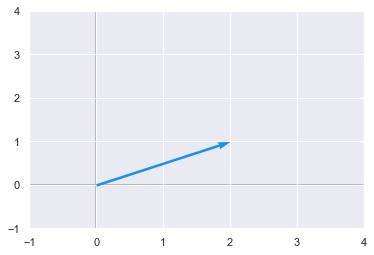

In [13]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

[[ 7]
 [17]]


(-1, 4)

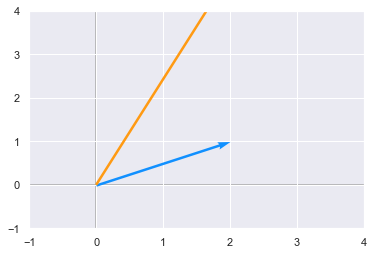

In [14]:
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

The linear oparator A can be used as linear transformation 

Let to have linear opearator  <br> <br> 
$$L =  \begin{bmatrix}cos(45^*) & -sin(45^*) \\ sin(45^*) & cos(45^*)  \end{bmatrix}=  \begin{bmatrix} 0.7  & 0.7 \\ 0.7 & 0.7  \end{bmatrix}$$
<br>
if we apply this linear operator to one vector, the result will be a rotation of this vector into $45^*$


example : <br> $$x =\begin{bmatrix} 3 \\ 3   \end{bmatrix}$$ <br> <br> <br> 

(-1, 4)

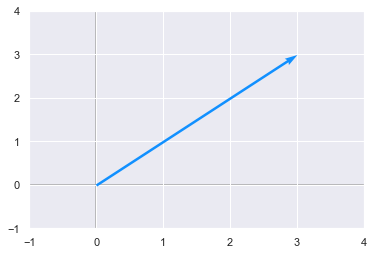

In [15]:
v = np.array([[3], [3]])
v.flatten()
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

$$x_2=Lx=  \begin{bmatrix}cos(45^*) & -sin(45^*) \\ sin(45^*) & cos(45^*)  \end{bmatrix} 
=  \begin{bmatrix} 0.7  & -0.7 \\ 0.7 & 4.4  \end{bmatrix}.\begin{bmatrix} 3 \\ 3   \end{bmatrix}=\begin{bmatrix} 0 \\ 7   \end{bmatrix}$$ <br> <br>




(-1, 10)

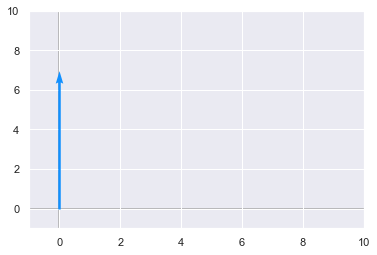

In [16]:
v = np.array([[0], [7]])
v.flatten()
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 10)
plt.xlim(-1, 10)

In [17]:
2*0.7*3

4.199999999999999

if we make one more tranformation $$x_3=  T(x_2)= T(\alpha) =  \begin{bmatrix}cos(45^*) & -sin(45^*) \\ sin(45^*) & cos(45^*)  \end{bmatrix}=  \begin{bmatrix} 0.7  & -0.7 \\ 0.7 & 0.7  \end{bmatrix}.\begin{bmatrix} 0 \\ 7   \end{bmatrix}=\begin{bmatrix} -4.9 \\ 4.9   \end{bmatrix}$$
 The linear tranformation T rotate every vector with 45 degree

In [18]:
def rotate_operator(alpha) :
    alpha = np.pi*alpha/180
    return np.array([[np.cos(alpha),-np.sin(alpha)],
          [np.sin(alpha),np.cos(alpha)]])


(-10, 10)

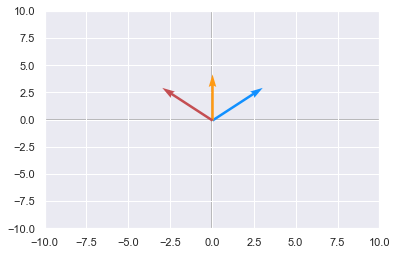

In [19]:
x = np.array([[3],[3]])
alpha = np.pi*45/180
L = np.array([[np.cos(alpha),-np.sin(alpha)],
          [np.sin(alpha),np.cos(alpha)]])
x1 = L.dot(x)
x2 = L.dot(x1)
a = np.concatenate((x.T,x1.T,x2.T),axis=0)
plotVectors(a, cols=['#1190FF', '#FF9A13','r'])
plt.ylim(-10, 10)
plt.xlim(-10, 10)

In [20]:
def cartesian_product(x,y):
    """
    retrun catesian product
    """
    return np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

In [21]:
x_args=y_args = np.linspace(0,10,9)
points = np.meshgrid(x_args,y_args)
result = cartesian_product(x_args,y_args)
new = result.dot(L.T)
result[:,0]

array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ])

(-10, 20)

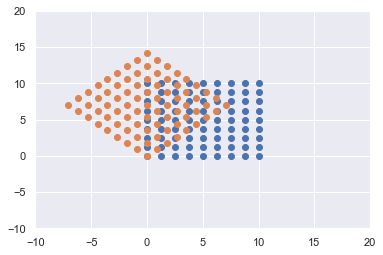

In [22]:
plt.scatter(result[:,0],result[:,1])
plt.scatter(new[:,0],new[:,1])
plt.ylim(-10, 20)
plt.xlim(-10, 20)

Scalling tranformation

(-10, 40)

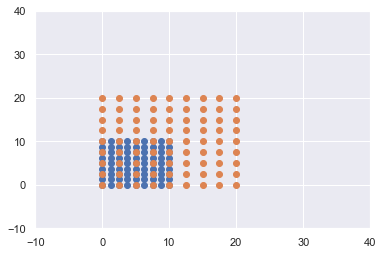

In [23]:
S = np.zeros((2, 2), int)
np.fill_diagonal(S, 2)
new = result.dot(S.T)
plt.scatter(result[:,0],result[:,1])
plt.scatter(new[:,0],new[:,1])
plt.ylim(-10, 40)
plt.xlim(-10, 40)

Scalling + Rotation

L = S.T

(-10, 40)

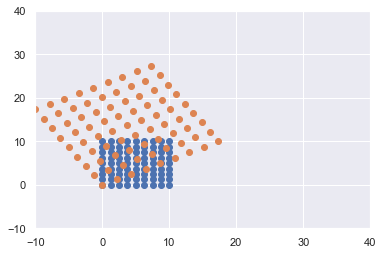

In [24]:
L = S.dot(rotate_operator(30))
new = result.dot(L.T)
plt.scatter(result[:,0],result[:,1])
plt.scatter(new[:,0],new[:,1])
plt.ylim(-10, 40)
plt.xlim(-10, 40)

(-10, 40)

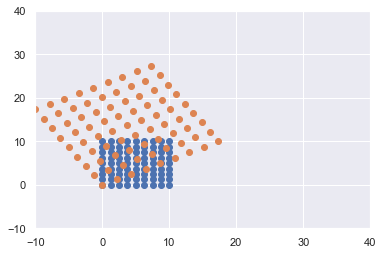

In [25]:
L = rotate_operator(30).dot(S)
new = result.dot(L.T)
plt.scatter(result[:,0],result[:,1])
plt.scatter(new[:,0],new[:,1])
plt.ylim(-10, 40)
plt.xlim(-10, 40)

lets have the linier operator  <br>
$$L =  \begin{bmatrix} 1.5 & 0.5 \\ 0.5 & 1.5  \end{bmatrix}$$
and let to apply it over our data

(-10, 40)

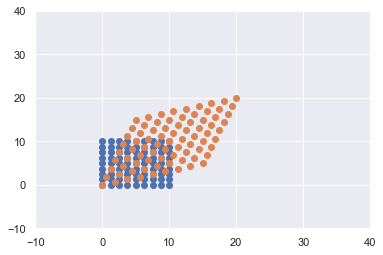

In [27]:
L = np.array([[1.5,0.5],[0.5,1.5]])
new = result.dot(L.T)
plt.scatter(result[:,0],result[:,1])
plt.scatter(new[:,0],new[:,1])
plt.ylim(-10, 40)
plt.xlim(-10, 40)

from above graphic we can see that some of the the points just is scalled with some number $lambda$ , mathematicaly
it means that  $A v_i = \lambda v_i$ .The vectors $v_i$ wich are scalled by number $\lambda_i$ in transformation are called
eigenvectors of Linear operator L the $\lambda_i$ are called eigenvalues.

# Eigenvectors and Eigenvalues

Definition Let L be an $n\times n$ matrix. <br> <br>
An eigenvector of L is a nonzero vector $\vec v$  such that $A v = \lambda v$ 
for some scalar  $\lambda$.<br><br>
An eigenvalue of L is a scalar $\lambda$  such that the equation $A v = \lambda v$ has 
a nontrivial solution. <br> <br>
If  $A v = \lambda v$  for $\vec v$  $A=0$,we say that $\lambda$ is the eigenvalue for  $\vec v$ ,and that $\vec v$  is an eigenvector for $\lambda$ .

using numpy we can find the eigen(vectors/values) of above matrix L

In [64]:
eigen_values,eigen_space = np.linalg.eig(L)
pr(r'$ \vec v_1 ={}$'.format(eigen_space[0,0]))
pr(r'$ \lambda_1 ={}$'.format(eigen_values[0]))
pr(r'$ \vec v_2 ={}$'.format(eigen_space[0][1]))
pr(r'$ \lambda_2 ={}$'.format(eigen_values[1]))
eigen_values = np.linalg.eig(L)
eigen_values

***$ \vec v_1 =0.7071067811865476$***

***$ \lambda_1 =2.0$***

***$ \vec v_2 =-0.7071067811865474$***

***$ \lambda_2 =1.0$***

(array([2., 1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

(-10, 25)

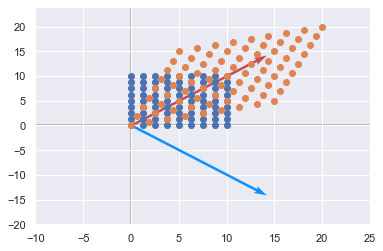

In [80]:
new = result.dot(L.T)
plotVectors(20*eigen_space, cols=['#1190FF', 'r'])
plt.scatter(result[:,0],result[:,1])
plt.scatter(new[:,0],new[:,1])
plt.ylim(-20, 24)
plt.xlim(-10, 25)

we can see that every point belong to $\lambda_i v_1$ just is scalled

## How do we find eigen things ?
<p>
We start by finding eigevalues.We know that the equation must be true :
$$A v = \lambda v $$
Now let us put in an identity matrix so we are dealing with matrix-vs-matrix:
$$A v = \lambda I v $$
Bring all to left hand side 
$$A v - \lambda I v = 0 $$
If v is non-zero then we can solve for $\lambda$ using just the :
$$|A  - \lambda I | v = 0  $$
We know that the above eq has sulotion if $$det|A  - \lambda I | = 0$$
</p> 
example :

  $$  \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=  \begin{bmatrix} \gamma & 0\\ 0 & \gamma \end{bmatrix}* \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}= $$ <br>
  
   $$  \Big{(} \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix}-\begin{bmatrix} \gamma & 0\\ 0 & \gamma \end{bmatrix} \Big{)} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}= \begin{bmatrix} 4-\gamma  & 2 \\ 1 & 3-\gamma  \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\begin{bmatrix} 0 \\ 0\end{bmatrix}$$ <br> 
   The homogens system has a solution only when <br>
$$ det \left(
\begin{array}{ccc}
   4-\gamma  & 2 \\ 1 & 3-\gamma 
\end{array} \right)=0$$ <br>

We factorize the characteristic polynomial and obtain  <br> 
$$ p(λ) = (4 − λ)(3 − λ) − 2 · 1 = 10 − 7λ + λ
2 = (2 − λ)(5 − λ) $$ <br>

giving the roots $λ_1 = 2$ and $λ_2 = 5$ which are the *einvalues of matrix 1) <br> ,<br>
$$\begin{bmatrix} 4-\gamma  & 2 \\ 1 & 3-\gamma  \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\begin{bmatrix} 0 \\ 0\end{bmatrix}$$
For  $λ_2 = 2$  we obtain : <br> 
$$\begin{bmatrix} 4-2  & 2 \\ 1 & 3-2 \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\begin{bmatrix} 2  & 2 \\ 1 & 1  \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\begin{bmatrix} 0 \\ 0\end{bmatrix}$$ <br> <br> 
This means any vector  $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $, where x2 = −x1, such as $x=1$ and $x_2=-1$ 
, is an eigenvector with eigenvalue 2. The corresponding eigenspace is given as : <br>
$$ E_1 = span[\begin{bmatrix} 10 \\ -10 \end{bmatrix}]$$ <br> <br>

For  $λ_2 = 5$  we obtain : <br> 
$$\begin{bmatrix} 4-5  & 2 \\ 1 & 3-5 \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\begin{bmatrix} -1  & 2 \\ 1 & -2  \end{bmatrix} * \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}=\begin{bmatrix} 0 \\ 0\end{bmatrix}$$ <br> <br> 
We solve this homogeneous system and obtain a solution space :
$$E_2 = span[\begin{bmatrix} 20 \\ 10 \end{bmatrix}]$$ <br>

 Theorem 1.
 <br> 
 The eigenvectors $x_1, . . . , x_n$ of a matrix A ∈ Rn×n with n distinct eigenvalues λ_1, . . . , λ_n are linearly independent.


<br> Theorem 2. Given a matrix $ A ∈ R^{m×n} $ , we can always obtain a symmetric, positive semidefinite matrix $S ∈ R*{n×n} $ by defining
$$S := A^TA \;\; \;\; 1)$$
Understanding why Theorem 2 holds is insightful for how we can
    use symmetrized matrices: Symmetry requires $S = S^T$ , and by inserting (1) we obtain $S = A^TA=A^T(A^T)^T=(A^TA)=S^T$


Theorem 3 (Spectral Theorem). If  𝐴∈𝑅𝑛×𝑛  is symmetric, there exists an orthonormal basis of the corresponding vector space  𝑉  consisting of eigenvectors of  𝐴 , and each eigenvalue is real.

Example : <br>
Consider the matrix <br>
    $$ A= \begin{bmatrix} 3 & 2 & 2 \\ 2 & 3 & 2 \\ 2 & 2 & 3  \end{bmatrix}$$
    
The characteristic polynomial of $A$ is $$p_A(λ) = −(λ − 1)^2(λ − 7)$$
so that we obtain the eigenvalues $λ_1 = 1$ and $λ_2 = 7$, where $λ_1$ is a
repeated eigenvalue. Following our standard procedure for computing
eigenvectors, we obtain the eigenspaces : <br>
$$E_1 = span[\begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix},\begin{bmatrix} -1 \\ 0\\ 1 \end{bmatrix}],\;\; E_7=span[\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}]$$ <br> <br>
We see that $x_3$ is orthogonal to both $x_1$ and $x_2$. However, since $x_1^T x_2=1\neq 0$ they are not orthogonal. The spectral theorem (3)
states that there exists an orthogonal basis, but the one we have is not
orthogonal. However, we can construct one.
To construct such a basis, we exploit the fact that x1, x2 are eigenvectors associated with the same eigenvalue λ. Therefore, for any α, β ∈ R it
holds that <br> 
$$A(αx_1 + βx_2) = Ax_1α + Ax_2β = λ(αx_1 + βx_2)$$,<br> <br>

i.e., any linear combination of $x1$ and $x2$ is also an eigenvector of A associated with λ. The Gram-Schmidt algorithm is a method
for iteratively constructing an orthogonal/orthonormal basis from a set of
basis vectors using such linear combinations. Therefore, even if $x_1$ and $x_2$
are not orthogonal, we can apply the Gram-Schmidt algorithm and find
eigenvectors associated with $λ1 = 1$ that are orthogonal to each other (and to x_3). In our example, we will obtain
  
  
$$ x_1^{'}= \begin{bmatrix} -1 \\ 1 \\ 0 \end{bmatrix},\;\;   x_2^{'} = \frac{1}{2} \begin{bmatrix} -1 \\ -1\\ 2 \end{bmatrix}$$ <br> <br>  
which are orthogonal to each other, orthogonal to x_3, and eigenvectors of $A$ associated with λ_1 = 1.

## Eigen decomposition

Eigen valie https://textbooks.math.gatech.edu/ila/eigenvectors.html
https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.7-Eigendecomposition/